In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2 as cv
from tensorflow.keras import backend as K
from application.Inception.inceptionV1 import model_builder
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

In [2]:
inception = model_builder((224, 224, 3), 1000)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              

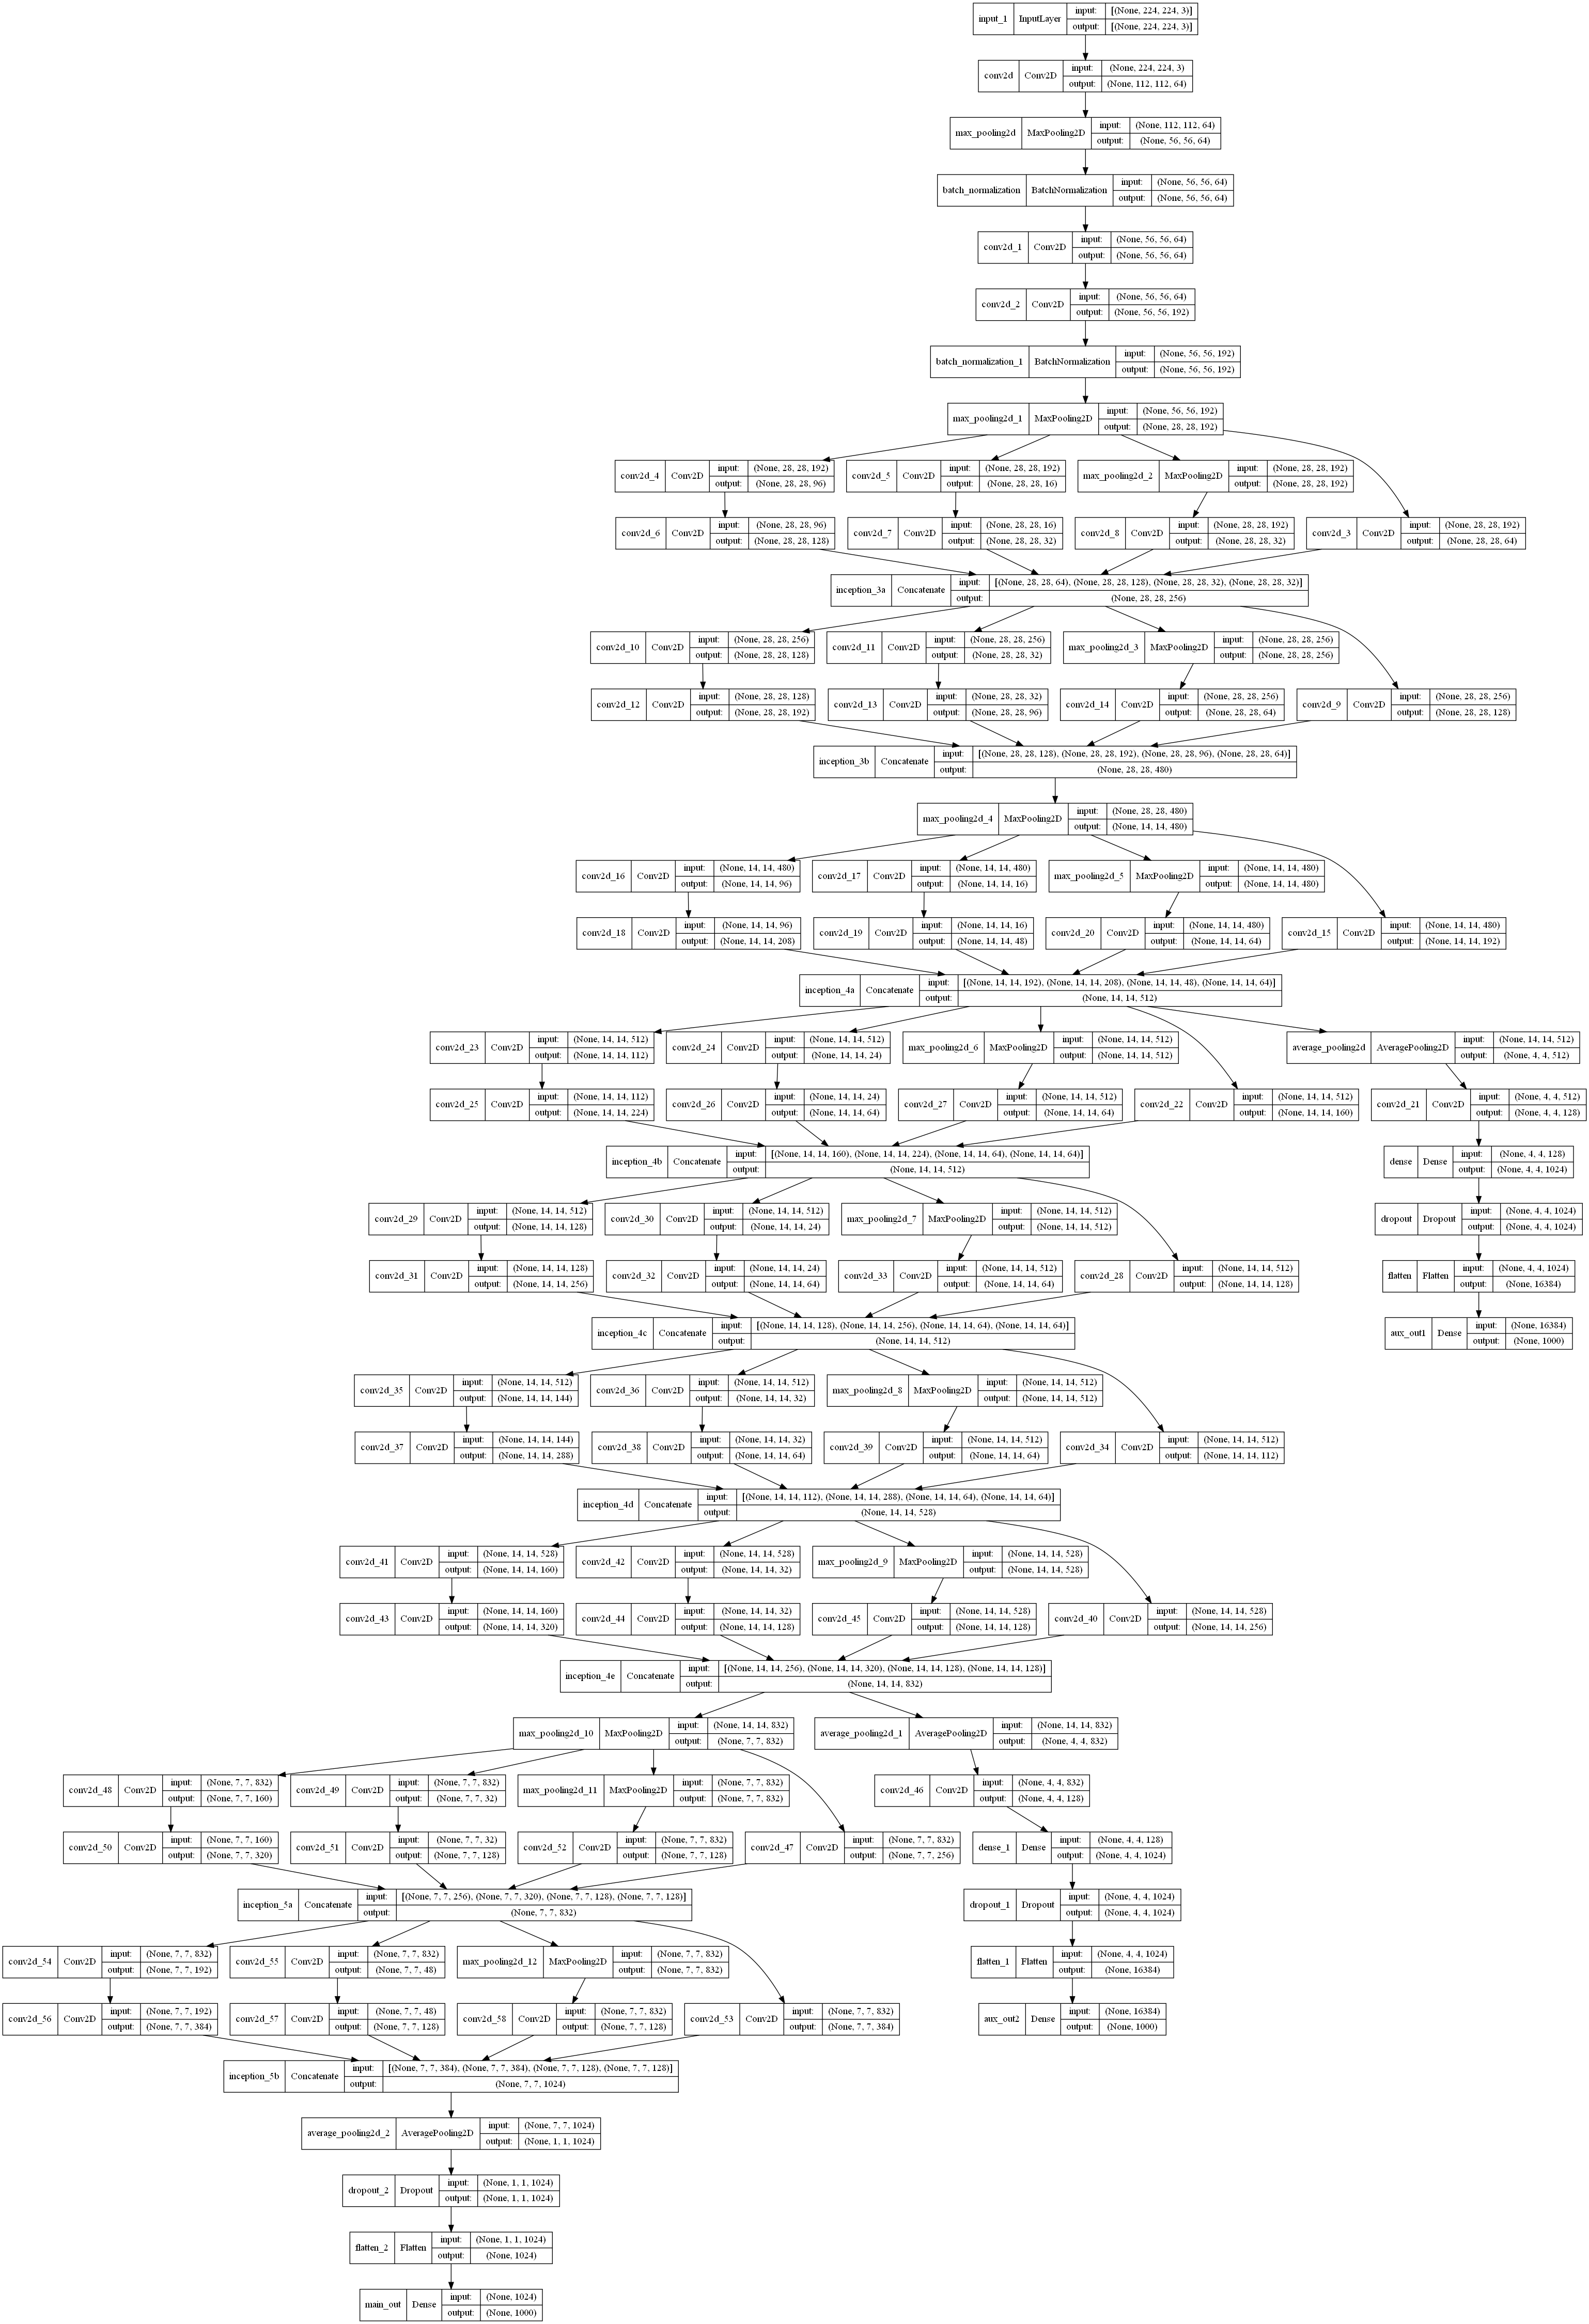

In [3]:
plot_model(inception, show_shapes=True, show_layer_names=True)